**FIT5201 Assignment 2 Task 2: Perceptron vs Neural Networks**  
**Student ID: 31237223**  
**Name: Darren Jer Shien Yee**  

**Question 2.1 Load Task2B train and test datasets**

In [4]:
import pandas as pd

train_data = pd.read_csv('Task2B_train.csv')
test_data = pd.read_csv('Task2B_test.csv')
X_train, y_train = train_data[['feature1', 'feature2']].values, train_data['label'].values
X_test, y_test = test_data[['feature1', 'feature2']].values, test_data['label'].values

**Question 2.1 Display loaded training data**

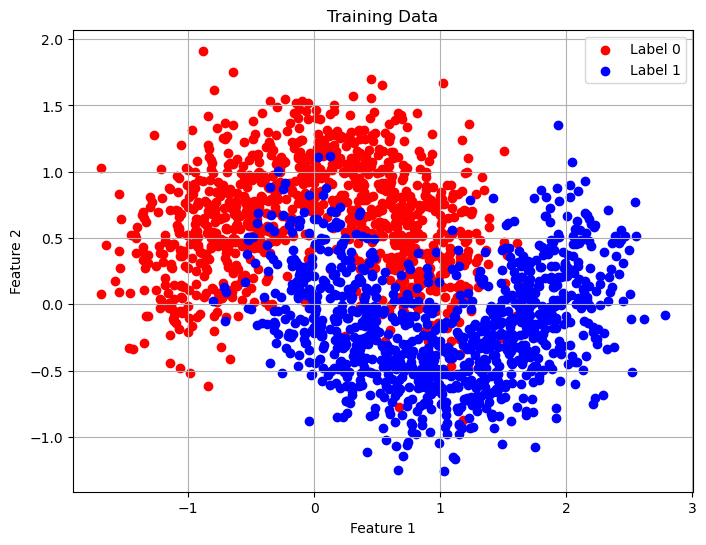

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Label 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Label 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.legend()
plt.grid(True)
plt.show()

**Question 2.1 Display loaded test data**

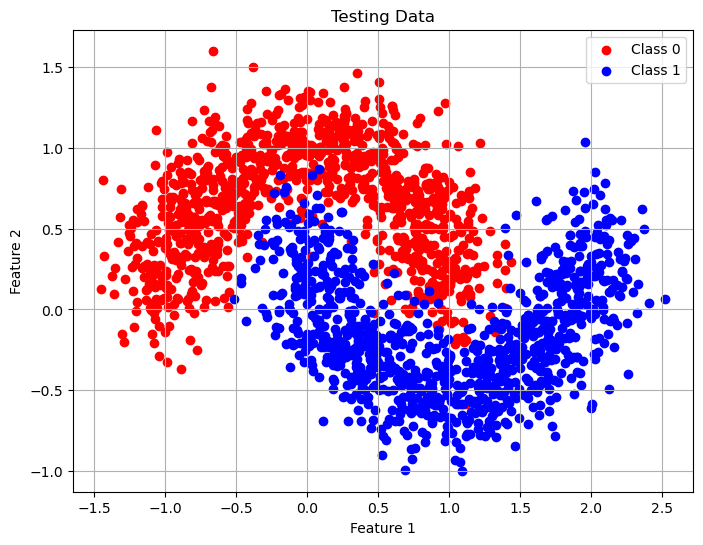

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Testing Data')
plt.legend()
plt.grid(True)
plt.show()

**Question 2.2 Perceptron class imported from lecture code**

In [7]:
import numpy as np
class Perceptron:
    
    def __init__(self, eta=0.01, tau_max=10000, epsilon=0.005, random_state=None):
        self.eta = eta   # learning rate
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon   # tolerable error
        self.random_state = random_state

    def fit(self, x, y):
        RNG = np.random.default_rng(self.random_state)
        n, p = x.shape

        self.w_trace_ = np.empty((self.tau_max, p))     # trace of weights during training
        self.xy_idx_trace_ = np.empty(self.tau_max, int) # trace of considered training point indices
        
        # initialisation of iteration counter and weights
        tau = 0 
        self.w_ = self.w_trace_[0,:] = RNG.normal(size=p) 
        terminate = False
        while not (terminate or (self.predict(x)!=y).mean()<self.epsilon):
            # random order to consider training data
            order = RNG.choice(np.arange(n),size = n ,replace = False)
            for i in range(n):
                if self.predict(x[order][i]) != y[order][i]:
                    self.w_ = self.w_ + (2*y[order][i]-1)*self.eta * x[order][i]
                
                self.w_trace_[tau+1] = self.w_
                self.xy_idx_trace_[tau] = order[i]

                tau +=1
                if tau == self.tau_max-1:
                    terminate = True
                    break
        
        # remove empty rows from traces
        self.w_trace_ = self.w_trace_[:tau] 
        self.xy_idx_trace_ = self.xy_idx_trace_[:tau-1]

        return self

    def predict(self, x):
        return (x.dot(self.w_) >= 0).astype(int)


**Question 2.2 Training Perceptron #1 with 0.1 Learning Rate**

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
add_constant = PolynomialFeatures(1)
add_constant.fit_transform(X_train)[:5]

perceptron_with_intercept_01 = make_pipeline(PolynomialFeatures(1), Perceptron(random_state=0,eta=0.1))
perceptron_with_intercept_01.fit(X_train, y_train)
perceptron_part_01 = perceptron_with_intercept_01.steps[1][1]

**Question 2.2 Training Perceptron #1 with 1.0 Learning Rate**

In [9]:
perceptron_with_intercept_10 = make_pipeline(PolynomialFeatures(1), Perceptron(random_state=0,eta=1.0))
perceptron_with_intercept_10.fit(X_train, y_train)
perceptron_part_10 = perceptron_with_intercept_10.steps[1][1]

**Question 2.2 Calculate testing error for both trained perceptrons**

In [10]:
from sklearn.metrics import zero_one_loss

train_error_01 = zero_one_loss(perceptron_with_intercept_01.predict(X_train), y_train)
test_error_01 = zero_one_loss(perceptron_with_intercept_01.predict(X_test), y_test)
train_error_10 = zero_one_loss(perceptron_with_intercept_10.predict(X_train), y_train)
test_error_10 = zero_one_loss(perceptron_with_intercept_10.predict(X_test), y_test)
train_error_01, test_error_01, train_error_10, test_error_10

(0.20599999999999996,
 0.20350000000000001,
 0.20399999999999996,
 0.20499999999999996)

**Question 2.2 Plotting Decision Boundary and test data for perceptron with n=0.1**

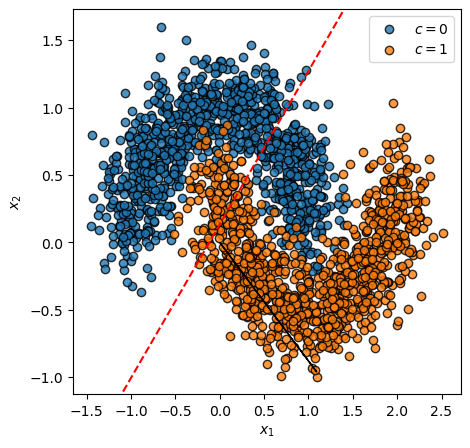

In [11]:
import matplotlib.pyplot as plt

def scatter_data_by_target_value(x, y, ax=None, scatter_params={'ec': 'black', 'alpha': 0.8}):
    ax = plt.gca() if ax is None else ax
    for c in range(2):
        x1_c = x[y==c, 0]
        x2_c = x[y==c, 1]
        ax.scatter(x1_c, x2_c, label=f'$c={c}$', **scatter_params)
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

def plot_line(slope, intercept, ax=None, shape='--', **kwargs):
    ax = plt.gca() if ax is None else ax
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.set_ylim(ax.get_ylim())
    ax.set_xlim(ax.get_xlim())
    ax.plot(x_vals, y_vals, shape, **kwargs)

def plot_decision_boundary_from_weights_with_intercept(w, ax=None):
    slope = -w[1]/w[2]
    intercept = -w[0]/w[2]
    plot_line(slope, intercept, ax, shape='--', color='red')

def plot_decision_boundary_from_weights(W1, W2, b2, ax=None):
    # Assuming the input data is 2D (X1 and X2)
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid points
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Calculate the decision boundary line
    slope = -W1 / W2
    intercept = -b2 / W2

    # Plot the decision boundary line
    plot_line(slope, intercept, ax, shape='--', color='red')


plt.figure(figsize=(5, 5))
scatter_data_by_target_value(X_test, y_test)
plot_decision_boundary_from_weights_with_intercept(perceptron_part_01.w_)
plt.arrow(0, 0, *perceptron_part_01.w_[1:]*5)
plt.show()

**Question 2.2 Plotting Decision Boundary and test data for perceptron with n=1.0**

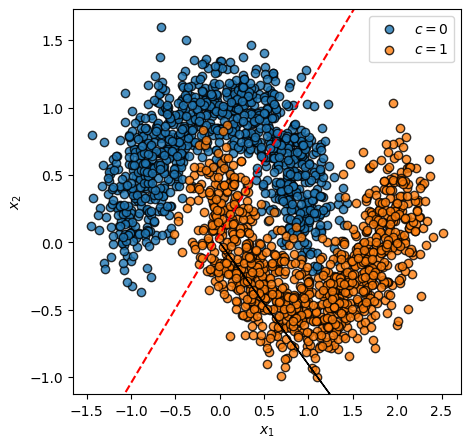

In [12]:
plt.figure(figsize=(5, 5))
scatter_data_by_target_value(X_test, y_test)
plot_decision_boundary_from_weights_with_intercept(perceptron_part_10.w_)
plt.arrow(0, 0, *perceptron_part_10.w_[1:]*5)
plt.show()

**Question 2.3 Three Layer NN code imported from Lectures**

In [13]:
class NN:
    def preprocess (self,T1,T2):
        T1 = T1.reshape(-1, 1)
        T2 = T2.reshape(-1, 1)
        return T1,T2
        
    # auxiliary functions 
    ## the activation function (sigmoid here)
    def h(self,z):
        return (1/(1+np.exp(-3*z)))
    
    ## the derivitive of the activation function (sigmoid here)
    def h_d(self,z):
        return (self.h(z)*(1-self.h(z)))
    
    ## Accuracy
    def accuracy(self,pred, label):
        return (pred == label).mean()
        
    def feedforward(self,Xi, Ti, W1, b1, W2, b2):
        ### 1st (input) layer 
        a1 = Xi                           
        y = Ti                          
        ### 2nd (hidden) layer
        z2 = a1 @ W1 + b1                            
        a2 = self.h(z2)                                  
        ### 3rd (output) layer
        z3 = a2 @ W2 + b2                         
        a3 = self.h(z3)                            
        return(a1, a2, a3, y, z2, z3)
        
    def backpropagation(self,Ti, W2, z2, z3, a3):
        ### 3rd (output) layer
        d3 = -(Ti-a3) * self.h_d(z3)                          
        ### 2nd (hidden) layer
        d2 =  (d3 @ W2.T) * self.h_d(z2)                          
        return(d2,d3)
        
    # one more aux functions before we start
    def predict(self,X, W1, W2, b1, b2, threshold=0.5):
        # we use the feedforward network we defined to obtain output activation (a3), we don't care about the
        # rest so we use _ to store them. We also don't need to send T so we just send 1 instead
        _,_, a3,_,_,_ = self.feedforward(X, 1,W1,b1, W2, b2)
        return np.array([1 if above_thresh else 0 for above_thresh in (a3 >= threshold)]).reshape(-1,1)
        
    def fit(self,K, X1, T1, X2, T2, eta, epoch_max=500, seed=None):
        T1,T2 = self.preprocess(T1,T2)
        if seed is not None: np.random.seed(seed)
        # Setting parameters
        eta = eta # learning rate
        alpha = 0.0001 # regularization term
        N,D = X1.shape
    
        # initialization
        epoch = 1 # epoch (iteration) counter
        terminate = False   # termination criteria
    
        ## weight vectors/matrices initialization
        ### w stands for weight and b for bias
        ### the numbers after the letters indicates the layer number
        W1 = np.random.normal(scale=0.5, size=(D,K)) * 0.01
        b1 = np.zeros((1,K))
        W2 = np.random.normal(scale=0.5, size=(K,1)) * 0.01
        b2 = np.zeros((1,1))
        ## tracing accuracy of the model 
        train_accuracy = []
        test_accuracy = []
        
        # main loop
        while (not terminate):
    
            # note that this is the vectorised implementaion so it slightly differs from the above implementation
            # try to spot and rationalize the differences.
            ## Feedforward:
            a1, a2, a3, y, z2, z3 = self.feedforward(X1, T1, W1, b1, W2, b2)
    
            ## Backpropagation:
            d2, d3 = self.backpropagation(T1, W2, z2, z3, a3)
    
            ## calculate the delta values
            ### 1st layer
            W1_d = a1.T @ d2
            b1_d = d2
            ### 2nd layer
            W2_d = a2.T @ d3
            b2_d = d3
    
            ## update weight vectors and matrices
            ### 1st (input) layer
            W1 = W1 - eta * (W1_d/N + alpha*W1)
            b1 = b1 - eta * (b1_d.mean(axis=0, keepdims=True))
            ### 2nd (hidden) layer
            W2 = W2 - eta * (W2_d/N + alpha*W2)
            b2 = b2 - eta * (b2_d.mean(axis=0, keepdims=True))
    
            ## trace train  and test accuracy
            train_accuracy.append(self.accuracy(self.predict(X1, W1, W2, b1, b2), T1))
            test_accuracy.append(self.accuracy(self.predict(X2, W1, W2, b1, b2), T2))
            ## increase the iteration counter
            epoch = epoch + 1
    
            ## check the termination criteria
            if (epoch >= epoch_max): terminate = True
            self.final_W1 = W1
            self.final_W2 = W2
            self.final_B1 = b1
            self.final_B2 = b2

        return (train_accuracy,test_accuracy)


**Question 2.3 Grid Search for NN model's hyper parameter and their testing errors**

In [34]:
hidden_units = [i for i in range(5, 41, 5)]
eta = [0.1,0.001]
testing_results = []
best_accuracy = float('-inf')
current_best_model = 0,0
for h in hidden_units:
    for e in eta:
        nn = NN()
        train,test = nn.fit(h,X_train, y_train, X_test, y_test,e,epoch_max = 1000)
        mean_test_accuracy = np.mean(test)
        if mean_test_accuracy > best_accuracy:
            print (mean_test_accuracy)
            current_best_model = [nn,h,e,mean_test_accuracy]
            best_accuracy = mean_test_accuracy
        testing_results.append([h,e,train,test])

0.6556376376376376
0.7017287287287287
0.7318138138138138
0.780598098098098
0.7847372372372372


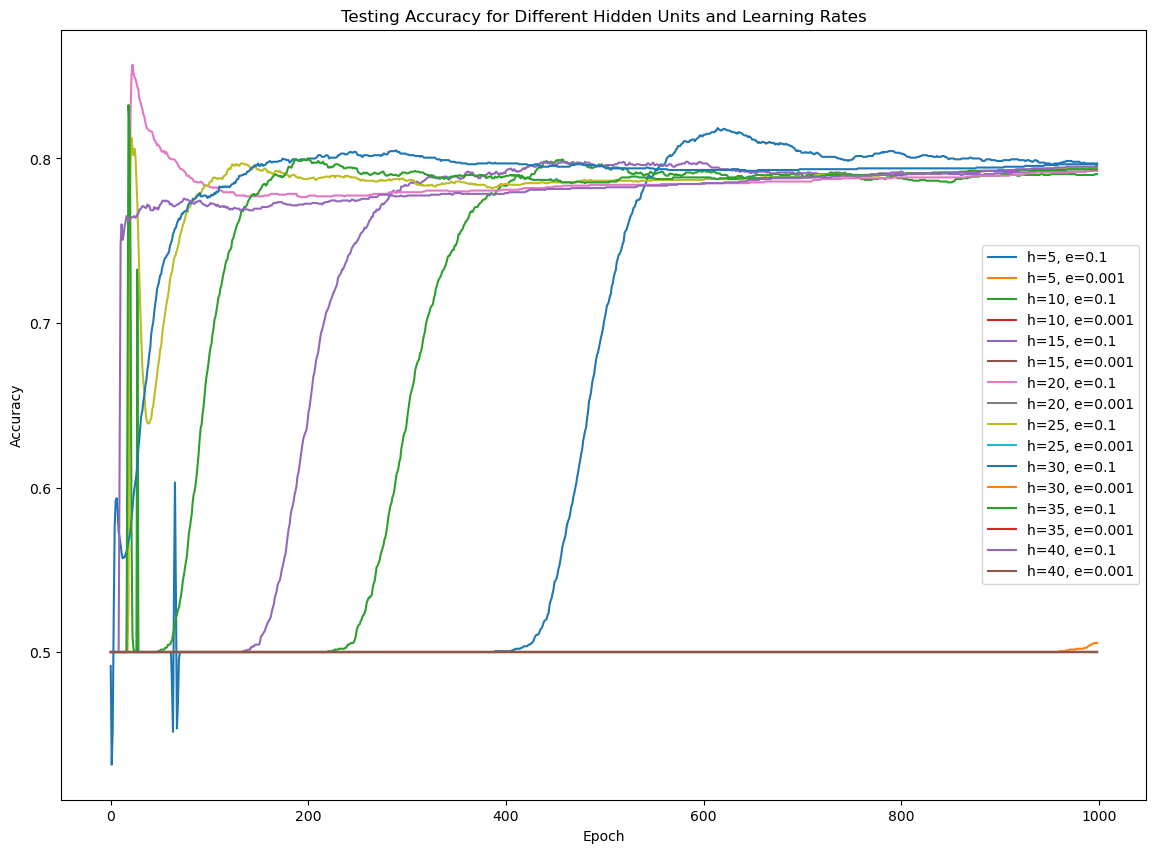

In [38]:
plt.figure(figsize=(14, 10))
for result in testing_results:
    h, e, train, test = result
    label = f"h={h}, e={e}"
    plt.plot(test, label=label, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy for Different Hidden Units and Learning Rates')
plt.legend()
plt.show()

In [39]:
print (current_best_model)

[<__main__.NN object at 0x000001A7EA664A90>, 30, 0.1, 0.7847372372372372]


**Question 2.3 Plotting decision boundary based on best model**

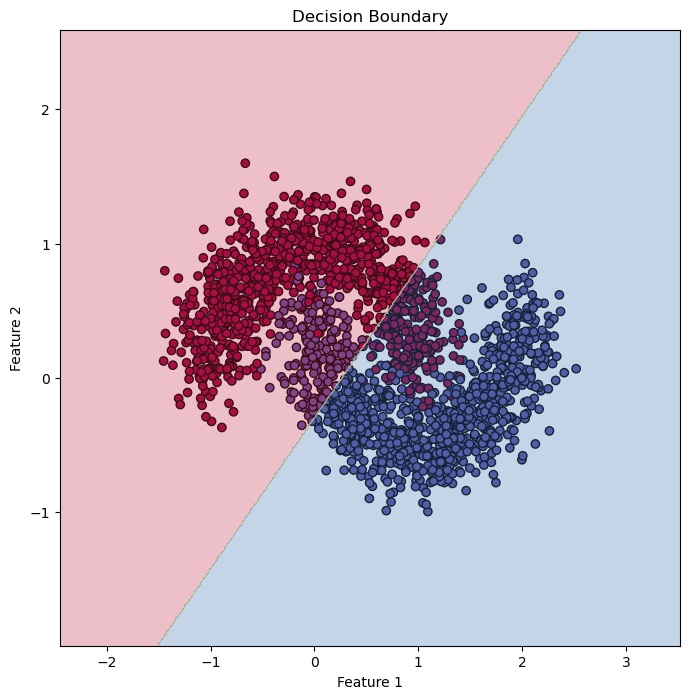

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), cmap=plt.cm.Spectral, edgecolors='k')

# Assuming the input data is 2D (X1 and X2)
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the grid points
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the grid
Z = current_best_model[0].predict(X_grid, current_best_model[0].final_W1, current_best_model[0].final_W2, current_best_model[0].final_B1, current_best_model[0].final_B2)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)

# Plot the training data
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

**Question 2.4 Justification**

As we can see from the plots above, the decision boundary when using the perceptron class can only be a straight line. This is primarly due to its limitations of updating its weights purely using linear transformations which means that it can only learn how to seperate classes using a straight line (linearly seperable data).   
The neural network should theoretically be able to create a non-linear decision boundary with its usage of non linear activation functions such as sigmoid in this case. This enables the model to learn non-linear relationships which can help it to create a fitting decision boundary that wraps around the different classes. However, our model only produces a decision boundary that is slightly better than the linear one seen in the perceptron class. This could be due to the model's lack of complexity given we are only using 3 layers and that we are using a self built neural network instead of a pretrained one which could help us yield a better result. 
